In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
df = pd.read_csv('../Renset data/history_w_videoinfo.csv', index_col=0)

df.head()

,video_title,video_id,channel_title,channel_link,date_watched,channel_id,published_date,description,thumbnail,tag
0,Schrödinger's Levels - Astortion Devlog,oPpzT6JKGk0,aarthificial,https://www.youtube.com/channel/UCtEwVJZABCd0t...,2022-08-09 13:27:58+02:00,UCtEwVJZABCd0tels2KIpKGQ,2022-07-30T14:59:48Z,=== Wishlist Astortion on Steam ===\nhttps://s...,https://i.ytimg.com/vi/oPpzT6JKGk0/hqdefault.jpg,"['game dev', 'devlog', 'dev log', 'programming..."
1,John mayer - neon (after 2 years of practice),dfjTp8YdNgk,אביה מילר,https://www.youtube.com/channel/UC-z1y3pCBSgTT...,2022-08-09 13:27:39+02:00,UC-z1y3pCBSgTT30ft7BVmRQ,2022-06-26T18:23:37Z,NaN,https://i.ytimg.com/vi/dfjTp8YdNgk/hqdefault.jpg,NaN
2,Are Chinese watches worth it?,HljYyn8U4a0,Talking Timepieces,https://www.youtube.com/channel/UCQkmGbeY6QVgw...,2022-08-09 13:13:38+02:00,UCQkmGbeY6QVgwUyIzJ6LbIg,2021-03-03T13:30:50Z,In this episode of #TalkingTimepieces​ we look...,https://i.ytimg.com/vi/HljYyn8U4a0/hqdefault.jpg,NaN
3,An Intricate $180 Beauty! | The Sugess Moonpha...,O50euB79Jjc,Tone,https://www.youtube.com/channel/UCn0vfLJzUsCFu...,2022-08-09 09:46:47+02:00,UCn0vfLJzUsCFuRwEiBf7TSw,2021-09-15T01:17:24Z,"Good day all, in this video, I showcase the Br...",https://i.ytimg.com/vi/O50euB79Jjc/hqdefault.jpg,"['watch', 'watches', 'moonphase', 'cheap watch..."
4,Corgeut Seamaster 300 Spectre v Omega Seamaste...,93v5Bso2NDU,Wonder of Watches,https://www.youtube.com/channel/UCCPbvLaMx8P-c...,2022-08-09 09:45:38+02:00,UCCPbvLaMx8P-ccHDKWQ2agw,2020-08-07T22:33:58Z,Corgeut Seamaster 300 Homage Review\n\nToday I...,https://i.ytimg.com/vi/93v5Bso2NDU/hqdefault.jpg,"['Corgeut', 'corgeut seamaster', 'corgeut seam..."


## Tutorial

In [11]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(url, delimiter=',', header='infer')

In [12]:
df_interest = df.loc[
    df['Country/Region'].isin(['United Kingdom', 'US', 'Italy', 'Germany'])
    & df['Province/State'].isna()]

In [13]:
df_interest.rename(
    index=lambda x: df_interest.at[x, 'Country/Region'], inplace=True)

df1 = df_interest.transpose()

/var/folders/tq/mmh1nq5157j8h6vvpxx3kx7c0000gn/T/ipykernel_39643/1643503374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest.rename(


In [14]:
df1 = df1.drop(['Province/State', 'Country/Region', 'Lat', 'Long'])
df1 = df1.loc[(df1 != 0).any(1)]
df1.index = pd.to_datetime(df1.index)

Text(0.5, 0, 'Dates')

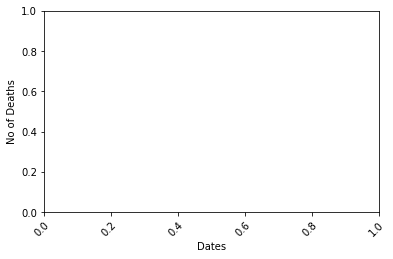

In [15]:
color = ['red', 'green', 'blue', 'orange']

fig = plt.figure()

plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen

plt.ylabel('No of Deaths')
plt.xlabel('Dates')

In [16]:
def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,4):
        p[i].set_color(color[i]) #set the colour of each curve

anim = ani.FuncAnimation(fig, buildmebarchart, interval = 100)

plt.show()

/Users/jeppefoldberg/miniforge3/envs/yt_overblik/lib/python3.10/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


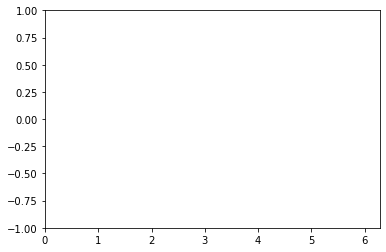

In [20]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

anim = ani.FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)

# anim.save("test.gif")
# plt.show()


In [21]:
plt.show()
